In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data validation:
- week Week sale was made, counted as weeks since product launch
- sales_method Character, which of the three sales methods were used for that customer
- customer_id Character, unique identifier for the customer
- nb_sold Numeric, number of new products sold
- revenue Numeric, revenue from the sales, rounded to 2 decimal places.
- years_as_customer Numeric, number of years customer has been buying from us (company founded in 1984)
- nb_site_visits Numeric, number of times the customer has visited our website in the last 6 months
- state Character, location of the customer i.e. where orders are shipped

## Issues :
### Quality Issues : 
- Completeness : There are missing values on revenue column -> 1074
- Consistency : sales_method like -> 'Email', 'Email + Call', 'Call', 'em + call', 'email'
- Accuracy : the company is built since 1984 so the maximum years_as_customer is 39 years but there are customers which deal with the company more than 39 like 63 years which is not valid 

## Cleaning Steps :
- I will use Iterative Imputer with Non Parametric model that not assumes any assumption about distribution ,because the column which has missing values "revenue" isn't normal or i can use any transformation to handle skewed then use Parametric model ,because there is not outliers so i will use mean as initial value ,i will predict values of revenue using nb_sold column/feature/predictor because it is high correlated to revenue 
- the maximum years_as_customer is 39 years but there are customers which deal with the company more than 39 like 63 years which is not valid ,i will drop this observation
- 'Email', 'Email + Call', 'Call', 'em + call', 'email' , replace 'em + call' to 'Email + Call' and i will change all to lower case


# Data Wrangle and (EDA or Preprocessing)


## Gathering Data

In [2]:
df=pd.read_csv(r'C:\Users\HP\Desktop\datacamp\Professional\product_sales.csv')

## Data assessing 
- Tidy Issues : There is no Tidy Issues

- Quality Issues : 
- Completeness : There are missing values on revenue column -> 1074
- Consistency : sales_method like -> 'Email', 'Email + Call', 'Call', 'em + call', 'email'
- Accuracy : the company is built since 1984 so the maximum years_as_customer is 39 years but there are customers which deal with the company more than 39 like 63 years which is not valid ,i will drop this observation

In [3]:
df.isna().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

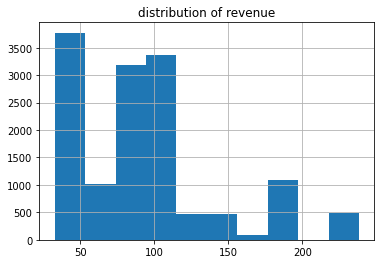

In [4]:
df['revenue'].hist()
plt.title('distribution of revenue')
plt.show()

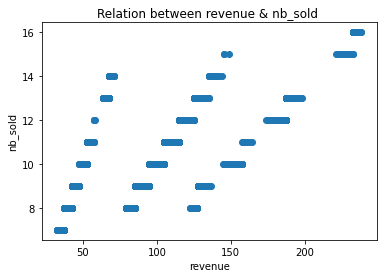

In [5]:
plt.scatter(df['revenue'],df['nb_sold'])
plt.title('Relation between revenue & nb_sold ')
plt.ylabel('nb_sold')
plt.xlabel('revenue')
plt.show()

In [6]:
df.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


After comparing the mean ,median ,it turns out that there are no extreme outliers

- I will use Iterative Imputer with <b> Non Parametric </b> model that not assumes any assumption about distribution ,because the column which has missing values isn't normal or i can use any transformation to handle skewed then use <b> Parametric </b> model

- because there is not outliers so i will use mean as initial value

- Instead of doing this step on two parts which means to change missing values to specific value on wrangle part then try to increase performance of the model or analysis on EDA or Preprocessing by using Advanced technique i will handle missing values using advanced techinque direct

## ( modifying or clean ) and ( EDA or Preprocessing ) 

##### Completeness : There are missing values on revenue column -> 1074

In [7]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.svm import SVR

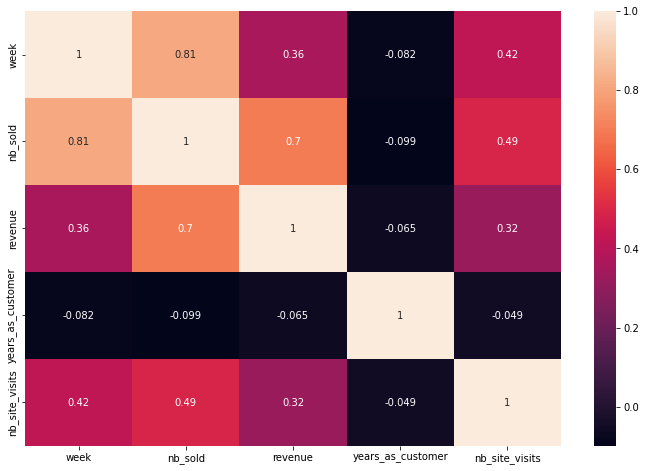

In [8]:
fig,ax=plt.subplots(1,1,figsize=(12,8))
sns.heatmap(df.corr(),annot=True,ax=ax)
plt.show()

- i will predict values of revenue using nb_sold column/feature/predictor

In [9]:
Iterative_Imputer=IterativeImputer(estimator=SVR(),random_state=42)

In [10]:
X=df[['revenue','nb_sold']]

In [11]:
df[['revenue','nb_sold']] = pd.DataFrame(Iterative_Imputer.fit_transform(X),columns=Iterative_Imputer.get_feature_names_out())

In [12]:
df['nb_sold']=df['nb_sold'].astype(int)

##### Accuracy : the company is built since 1984 so the maximum years_as_customer is 39 years but there are customers which deal with the company more than 39 like 63 years which is not valid ,i will drop this observation

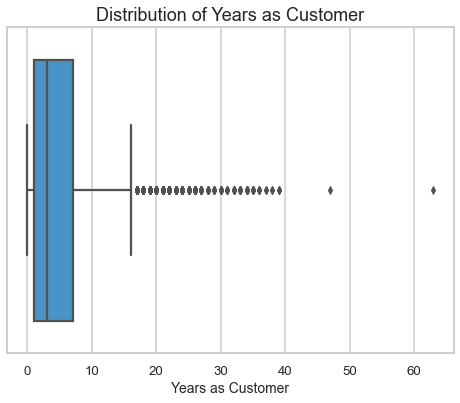

In [13]:
sns.set_style('whitegrid')
sns.set_context('talk', font_scale=0.8)

# Create boxplot with customized parameters
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df['years_as_customer'], ax=ax, color='#3498db')
ax.set_xlabel('Years as Customer', fontsize=14)
ax.set_title('Distribution of Years as Customer', fontsize=18)
plt.show()

In [14]:
df['years_as_customer'].max()

63

In [15]:
df[df['years_as_customer']>39].index

Int64Index([13741, 13800], dtype='int64')

In [16]:
df[df['years_as_customer']>39].index

Int64Index([13741, 13800], dtype='int64')

In [17]:
df = df[df.index.isin(df[df['years_as_customer']>39].index)==False]

##### Consistency : sales_method like -> 'Email', 'Email + Call', 'Call', 'em + call', 'email'

In [18]:
df['sales_method'].unique()

array(['Email', 'Email + Call', 'Call', 'em + call', 'email'],
      dtype=object)

In [19]:
df['sales_method']=df['sales_method'].str.lower()\
                  .replace('em + call','email + call')

# Analysis

### Questions:

1. How many customers were there for each approach?
2. What does the spread of the revenue look like overall? And for each method?
3. Was there any difference in revenue over time for each of the methods?
4. Based on the data, which method would you recommend we continue to use? Some of these methods take more time from the team, so they may not be the best for us to use if the results are similar.


In [20]:
def axis(xlabel,ylabel,title):
    return plt.title(title),plt.xlabel(xlabel),plt.ylabel(ylabel)

1. How many customers were there for each approach?


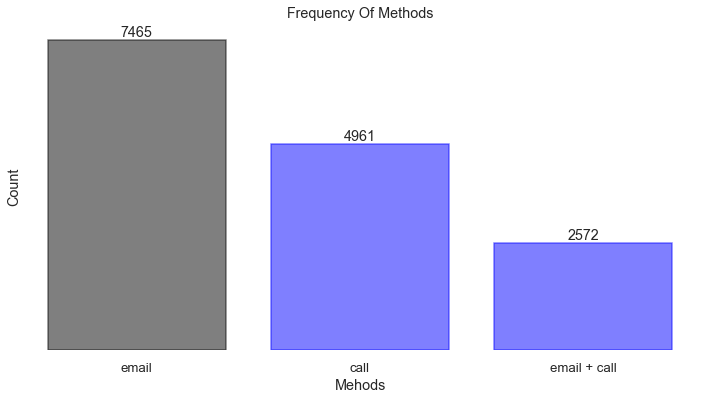

In [21]:
fig,ax=plt.subplots(1,1,figsize=(12,6))
bars = sns.countplot(data=df,x='sales_method',order=['email','call','email + call'],ax=ax,alpha=0.5)
axis('Mehods','Count','Frequency Of Methods')
plt.yticks([])
plt.box(False)
bars.patches[0].set_color('black')
bars.patches[1].set_color('blue')
bars.patches[2].set_color('blue')

for _ in bars.containers:
    bars.bar_label(_)

email method get most number of deals rather than call or mixed methods

2. What does the spread of the revenue look like overall? And for each method?


In [45]:
def plot_hist_freedman_diaconis(df, column, n_bins=None):
    """ Plot a histogram of a column in a dataframe using the Freedman-Diaconis rule to determine the number of bins."""
    """
    Parameters:
        -----------
        df : pandas.DataFrame
            The dataframe containing the column to plot.
        column : str
            The name of the column to plot.
        n_bins : int, optional
            The number of bins to use in the histogram. If not provided, the number of bins will be determined
            using the Freedman-Diaconis rule.

        Returns:
        --------
            None   
    """
    
    
    # Determine the number of bins using the Freedman-Diaconis rule
    if not n_bins:
        q1, q3 = np.percentile(df[column], [25, 75])
        iqr = q3 - q1
        bin_width = 2 * iqr / (len(df) ** (1/3))
        n_bins = int(np.ceil((max(df[column]) - min(df[column])) / bin_width))
    
    # Generate the histogram
    n, bins, patches = plt.hist(df[column], bins=n_bins, edgecolor='white', alpha=0.7,color='green')

    # Add labels and title
    plt.xlabel(column.capitalize())
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column.capitalize()}')

    # Add x-axis labels
    bin_width = n_bins/(max(df[column]) - min(df[column])) 
    xticks = np.arange(min(df[column]), max(df[column]), bin_width)
    xlabels = [round(x, 2) for x in np.arange(min(df[column]) + bin_width/2, max(df[column]), bin_width)]
    plt.xticks(xticks, xlabels, rotation=90)

    plt.box(False)
    # Show the plot
    plt.show()


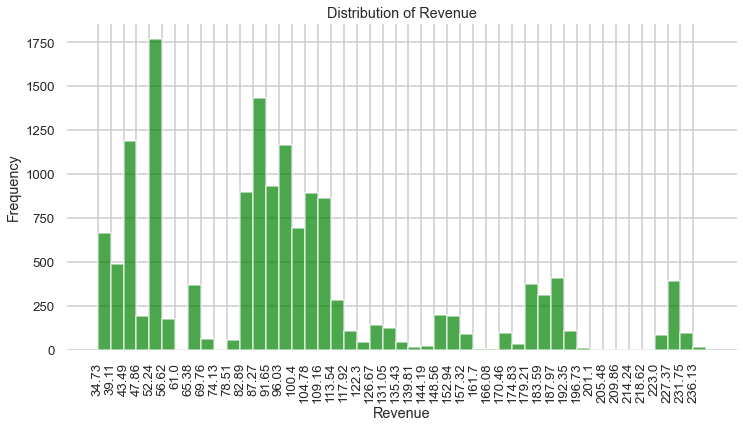

In [49]:
plt.figure(figsize=(12, 6))
plot_hist_freedman_diaconis(df,'revenue')


most revenue between (34.73 and 56.62) ,(87.27 and 109.16)

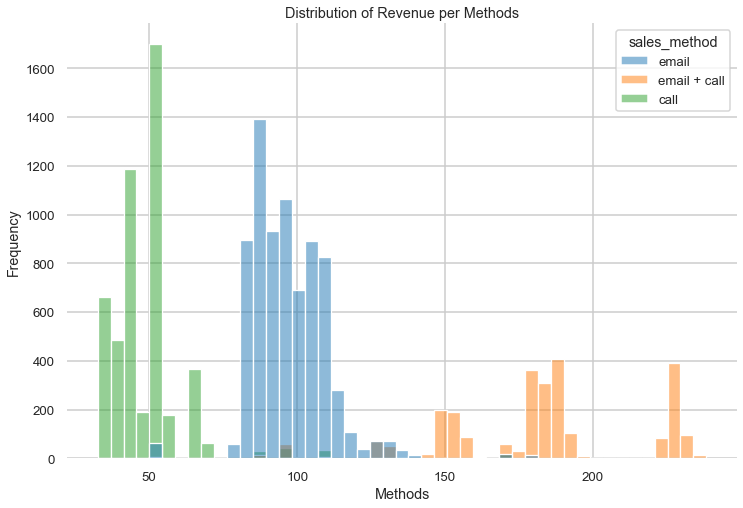

In [24]:
plt.figure(figsize=(12,8))
plt.box(False)
plt.ylabel('Frequency')
plt.xlabel('Methods')
plt.title('Distribution of Revenue per Methods')
sns.histplot(data=df,x='revenue',hue='sales_method',bins=47)
plt.show()

The two methods that have a higher frequency of orders but lower revenue per order may be good for generating a steady stream of revenue, but may not be as effective at generating high-value sales. These methods may be more appropriate for targeting customers who are price-sensitive or who are interested in a wider range of products.

The method that has a lower frequency of orders but higher revenue per order may be more effective at generating high-value sales, but may not be as reliable for generating a steady stream of revenue. This method may be more appropriate for targeting customers who are willing to pay a premium for high-quality or specialized products.


3. Was there any difference in revenue over time for each of the methods?

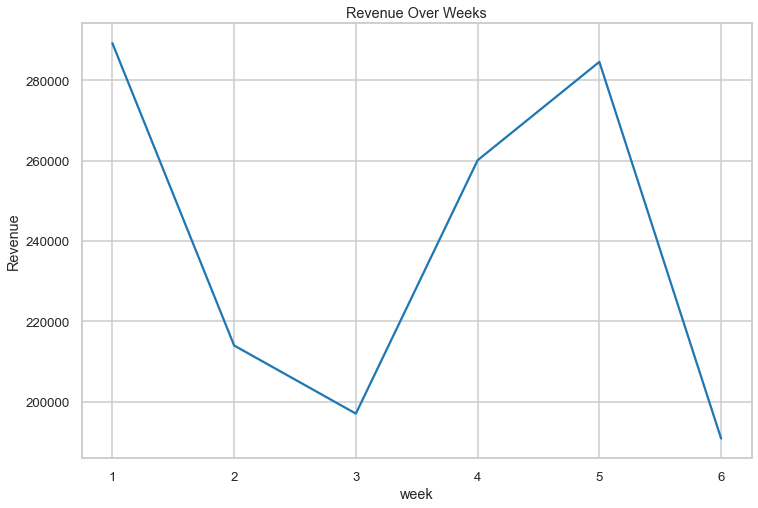

In [25]:
plt.figure(figsize=(12,8))
df.groupby('week')['revenue'].sum().plot()
plt.title('Revenue Over Weeks')
plt.ylabel('Revenue')
plt.show()

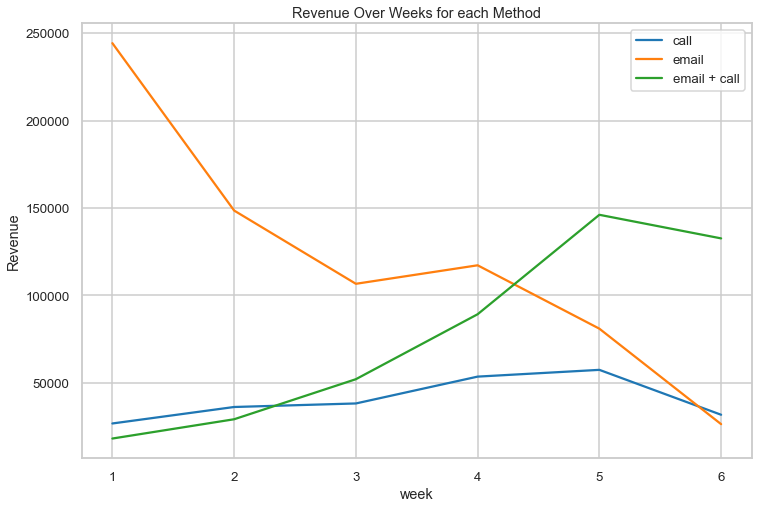

In [26]:
plt.figure(figsize=(12,8))
df.groupby(['sales_method','week'])['revenue'].sum()['call'].plot(label='call')
df.groupby(['sales_method','week'])['revenue'].sum()['email'].plot(label='email')
df.groupby(['sales_method','week'])['revenue'].sum()['email + call'].plot(label='email + call')
plt.title('Revenue Over Weeks for each Method')
plt.ylabel('Revenue')
plt.legend()
plt.show()

* from last two plots
- revenue of email on first week is highest which email and call is lowest ,while revenue of email and call is highest on last week while email is lowest ,also revenue of emaill decrease while revenue of email and call increase over the six weeks
- call not gives good revenue like other methods ,in addition it also takes more time " 30 " minutes also revenue per order is lowest one 
- so the choice will be between email ,email and call 


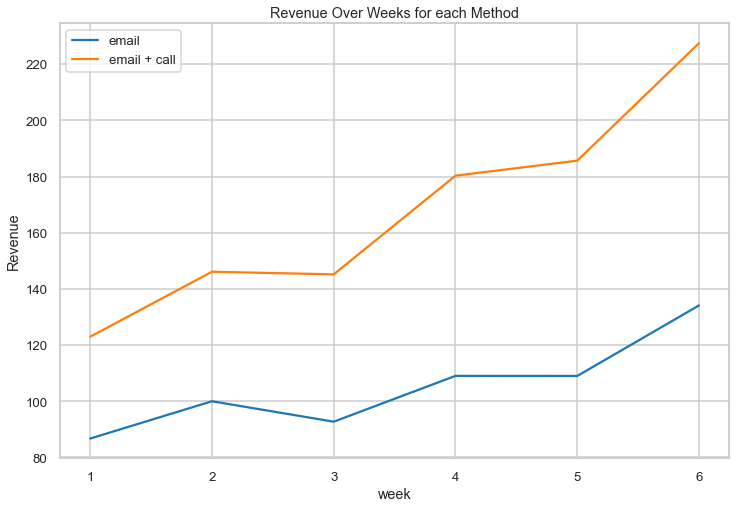

In [27]:
plt.figure(figsize=(12,8))
df.groupby(['sales_method','week'])['revenue'].mean()['email'].plot(label='email')
df.groupby(['sales_method','week'])['revenue'].mean()['email + call'].plot(label='email + call')
plt.title('Revenue Over Weeks for each Method')
plt.ylabel('Revenue')
plt.legend()
plt.show()

Average Revenue of email + call is highest than email over the weeks

4. Based on the data, which method would you recommend we continue to use? Some of these methods take more time from the team, so they may not be the best for us to use if the results are similar.


In [28]:
H_Test=df[['sales_method','revenue','week']]

In [29]:
H_Test=H_Test[H_Test['sales_method']!='call']

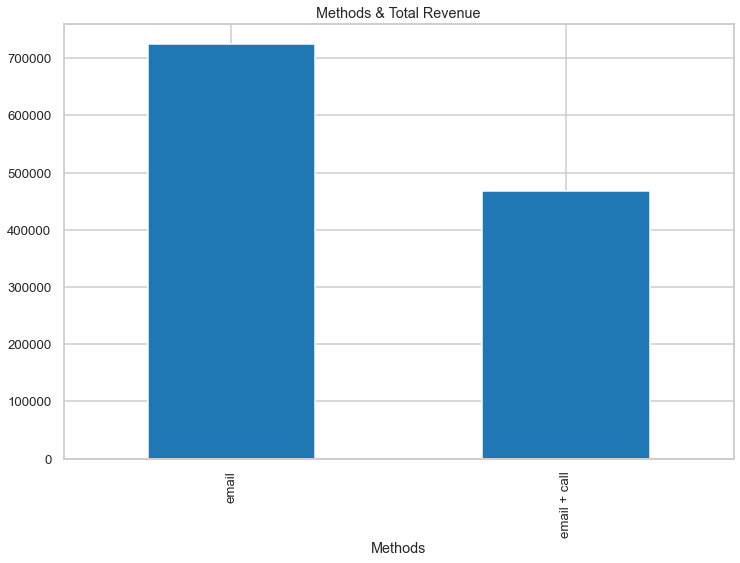

In [30]:
plt.figure(figsize=(12,8))
H_Test.groupby(['sales_method'])['revenue'].sum().plot(kind='bar')
plt.title('Methods & Total Revenue')
plt.xlabel('Methods')
plt.show()

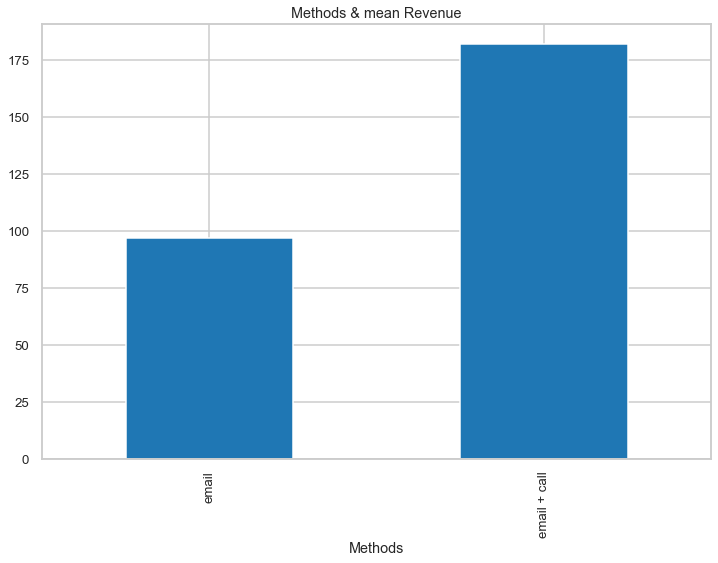

In [31]:
plt.figure(figsize=(12,8))
H_Test.groupby(['sales_method'])['revenue'].mean().plot(kind='bar')
plt.title('Methods & mean Revenue')
plt.xlabel('Methods')
plt.show()

## I will do 2 hypothesis tests to determine which method to choose

# First Hypothesis Test 
The difference between revenue of alternative is significant?
- Null : To_email - To_email_call >= 0 
- Alternative : To_email - To_email_call < 0 

In [32]:
Sample_diff = H_Test[H_Test['sales_method']=='email']['revenue'].sum()-H_Test[H_Test['sales_method']=='email + call']['revenue'].sum()

In [33]:
differences = []
Sample = H_Test.sample(frac=1)
for _ in range(10000):
    New_Sample = Sample.sample(frac=1,replace=True)
    differences.append(New_Sample[New_Sample['sales_method']=='email']['revenue'].sum()-New_Sample[New_Sample['sales_method']=='email + call']['revenue'].sum())

In [34]:
np.std(differences)

12304.999519763105

In [51]:
null = np.random.normal(0,12456.145025344704,size=10000)

In [52]:
pd.DataFrame(null).quantile(0.05)

0   -20455.446062
Name: 0.05, dtype: float64

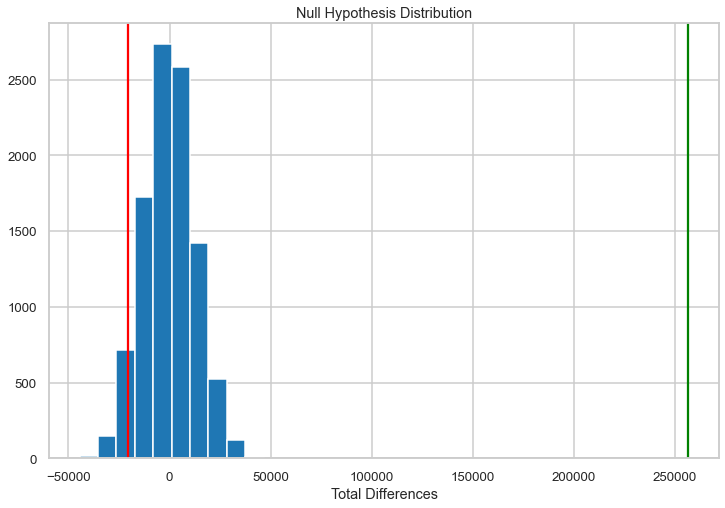

In [53]:
plt.figure(figsize=(12,8))
pd.DataFrame(null)[0].hist()
plt.axvline(-20455.446062,color='red')
plt.axvline(Sample_diff,color='green')
plt.title('Null Hypothesis Distribution')
plt.xlabel('Total Differences')
plt.show()

In [38]:
pvalue = (null < Sample_diff).mean()
pvalue

1.0

# Second Hypothesis Test

The difference between mean revenue of alternative is significant?
- Null : me_email - me_email_call <= 0 
- Alternative : me_email - me_email_call > 0 

In [39]:
Sample_mean = H_Test[H_Test['sales_method']=='email']['revenue'].mean()-H_Test[H_Test['sales_method']=='email + call']['revenue'].mean()
Sample_mean

-84.78222325725666

In [40]:
mean_differences = []
Sample = H_Test.sample(frac=1)
for _ in range(10000):
    New_Sample = Sample.sample(frac=1,replace=True)
    mean_differences.append(New_Sample[New_Sample['sales_method']=='email']['revenue'].mean()-New_Sample[New_Sample['sales_method']=='email + call']['revenue'].mean())

In [41]:
np.std(mean_differences)

0.665916060830223

In [54]:
null = np.random.normal(0,0.6609560462377129,size=10000)
pd.DataFrame(null).quantile(0.95)

0    1.084377
Name: 0.95, dtype: float64

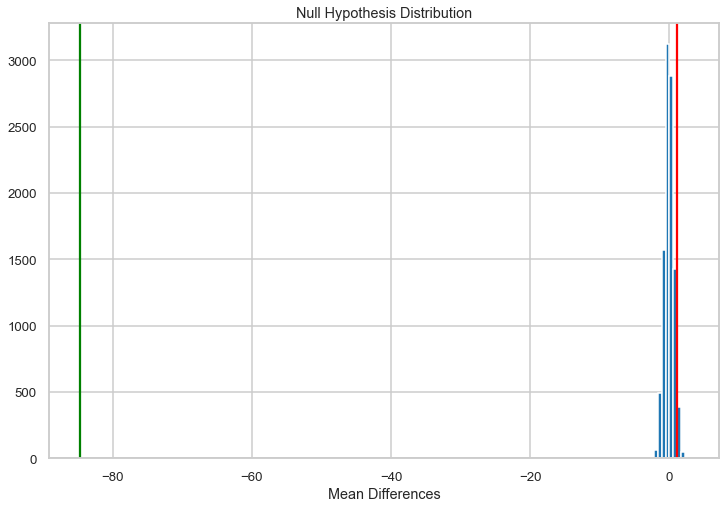

In [55]:
plt.figure(figsize=(12,8))
pd.DataFrame(null)[0].hist()
plt.axvline(1.084377,color='red')
plt.axvline(Sample_mean,color='green')
plt.title('Null Hypothesis Distribution')
plt.xlabel('Mean Differences')
plt.show()

In [44]:
pvalue = (null > Sample_mean).mean()
pvalue

1.0

Bonferroni corrected : 
alpha value will be 0.05/2=0.025

Null : To_email - To_email_call >= 0
Alternative : To_email - To_email_call < 0
we don't reject the null ,so the difference is not significant

Null : me_email - me_email_call <= 0
Alternative : me_email - me_email_call > 0
we don't reject the null ,so the difference is not significant

# Business Metric :
- the best techniques to sell the new product effectively : i can't choose one of them because there are many Factors to decide the method ,there are various factors to consider when selecting a marketing method, such as the frequency , revenue per order ,time.

# Summary & Recommendation :
**Summary :**
Based on the hypothesis testing conducted,
Null : To_email - To_email_call >= 0, Alternative : To_email - To_email_call < 0 we don't reject the null ,so the difference is not significant

Null : me_email - me_email_call <= 0, Alternative : me_email - me_email_call > 0 we don't reject the null ,so the difference is not significant

i did not reject the null hypothesis for both To_email and me_email. However, there are other factors that need to be considered, such as the duration of the promotion for the new product line, the frequency and revenue ,time.

**so the opinion will be based on somethings :**
- For higher frequency of orders but lower revenue per order ,generating a steady stream of revenue,, email may be a good choice.
- On the other hand ,For lower frequency of orders but higher revenue per order ,generating high-value sales per order, both email and call may be more effective. 
- Less time -> email ,more time -> email & call
- It is important to note that the average revenue of email alone is lower than that of email and call. 
- while also my **recommendation** considering extending the promotion duration.

In case the team needs to select a method quickly, they can choose between email and email & call according to their priorities.
